# Ensemble Methods Basic concepts

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [6]:
import warnings
import scipy.io
#import numpy as np
#import pandas as pd
#from time import time
#from sklearn import datasets, grid_search, cross_validation, metrics, ensemble, tree
#from IPython.core.display import Image
#from addutils import css_notebook
#css_notebook()

ImportError: cannot import name doccer

## 1 Introduction

Ensemble Methods combine the predictions of several models in order to improve generalizability / robustness over a single model.

Among many ensemble methods, two of the most popular families of methods are:

* **B**ootstrap **agg**regation or **Bagging** (also called **Averaging**): train multiple models by randomly *sample with replacement (values can be duplicated)* from the dataset and then average (or vote) the predictions. Bagging seems to work better with High-Variance Low-Bias models by decreasing Variance (averaging, the Bias remains that of a single model). This concept is used by these algorithms:

  * **`RandomForestClassifier` / `RandomForestRegressor`**
  * **`ExtraTreesClassifier` / `ExtraTreesRegressor`**

* **Boosting**: incrementally build an ensemble of *weak* classifiers to produce a powerful *commitee*. Here by weak we denote a classifier that is only slightly better than random guessing. In boosting each new model is trained with a modified version of the data to emphasize the training instances (by assigning higher weights)  that previous models mis-classified. In some cases, boosting has been shown to yield better accuracy than bagging, but increasing boosting steps tends to over-fit data and the algorithm is computationally more expensive than bagging. The algorithms that use this method are:

  * **`AdaBoostClassifier` / `AdaBoostRegressor`**
  * **`GradientBoostingClassifier` / `GradientBoostingRegressor`**

*Remark*. In principle bagging and boosting are techniques that can be used with a variety of algorithms. In practice (expecially in the case of bagging) the preferred choice are trees (low-bias high-variance algorithm).

###1.1 Decision Trees

**Decision Trees** are supervised learning algorithms used for classification and regression. They work by partitioning the feature space into a set of rectangles, and then fit a simple model in each one, for example a constant. The following algorithm is the one used by CART, one of the most popular decision tree algorithm.

Suppose to have a regression problem with two variables $X_1$, $X_2$ and response variable $Y$. At the beginning the tree chooses a variable, let's say $X_1$, and split the region in two at a certain point $X_1 = t_1$, with values in $R_1$ for $X_1 \leq t_1$ and values in $R_2$ for $X_1 > t_1$. The two region are further divided and each time the algorithm chooses a variable and a split point, until a certain criterion is met and the algorithm terminate. The reponse value in each region is the average value of $Y$ in that region. For classification problems the class of a region is the majority of classes of $Y$ that fall in that region.

In the case of regression the best combination of variable and split point is determined with a greedy strategy. For each variable the algorithm chooses the best splitting point (the one that minimiza the residual sum of square in the two region) and among all the best pairs (variable, split point).

For classification problems the criterion for choosing the splitting point is usually the **Gini index**. Gini index (or **Gini impurity**) is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. Gini impurity can be computed by summing the probability of each item being chosen times the probability of a mistake in categorizing that item. The formula for the gini impurity measure is: $\sum_{k=1}^K p_{mk}(1-p_{mk})$, where $m$ is the terminal node and $K$ is the number of classes. It reaches its minimum (zero) when all cases in the node fall into a single target category. Gini impurity reaches its maximum value when all classes in the table have equal probability.

To illustrate the structure of a decision tree, we provide an example with sklearn tree class. 

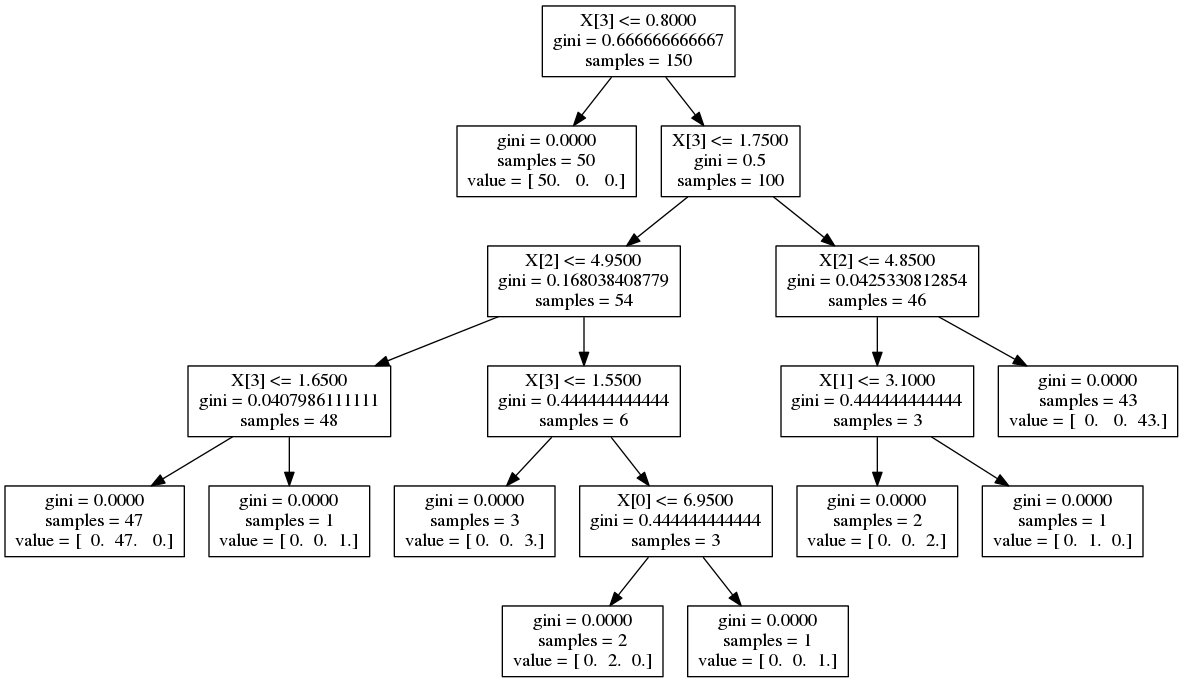

In [19]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.core.display import Image

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
with open("temp/temp.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
! dot -Tpng temp/temp.dot -o temp/temp.png
Image("temp/temp.png")

**Remarks**
- Trees are conceptually simple to draw and interpret
- Little data preparation, they can handle categorical predictors and do not require normalization
- Tend to learn a too complex model and they do not generalize well (high variance)
- Susceptible to small perturbation in the data
- Some concept (for example xor) are hard to learn by a tree

## 2 Random Forests

**Random Forest** technique works by building a large ensemble of de-correlated trees and then averages them. The algorithm uses a modified version of bagging (samples drawn with replacement), where each tree is built on a random subspace of data. Bagging averages a set of approximately unbiased models to reduce variance. Trees works well in this context because they can capture complex interaction in the data. In bagging samples are not necessarily independent and thus averaging doesn't account for all variance. The idea of Random Forests is to reduce the correlation of each tree (and thus decrease variance) by randomly selecting a subset of input variables for each split in the tree. This procedure slightly increases bias but achieve a better variance reduction.

Random Forests are a popular method because the work surprisingly well off the shelf and require few parameters (apparently only one) to be set.

The main parameter to adjust is `m` the number of variables selected at random for each split. In sklearn the parameter is called `max_features` and it is passed to the class constructor or chosen via grid search. 

The recommended value for `max_features` is $\sqrt{p}$ (where p is the total number of features) for classification problems or $\lfloor p/3 \rfloor$ for regression problems. These are rule of thumb and work well for most datasets. In practice it is useful to start with the default and then refine the result. The lower the greater the reduction of correlation between any pair of tree and hence reduce the variance of the average (but increase bias). Note that in scikit-learn the default value of `max_features` for regression is $p$ (use all features). 

`max_features` can be used in several way depending on the type of parameter passed, use `int` $\to$ number of features to use, `float` $\to$ percentage of features to use, `auto` $\to$ $\sqrt{p}$ (classification) or $p$ (regression), `none` $\to$ all features.

Another parameter of interest is `n_estimators`, that is the number of trees in the forest. Since Random Forests are an averaging method they do not usually overfit by adding more trees and the larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a sufficient number of trees.

Random Forests are said to hardly overfit the data. This is not always the case and the average of fully grown trees can result in a model that is too rich and with too much varianche. If this is a concern, there are few ways to reduce tree depth, either by specifying the limit directly or by setting the number of training samples in the leaf, or the minimum number of samples to split. In scikit-learn this parameters are:

- `max_depth` if `none` the nodes are expanded until pure or `min_samples_split`.
- `min_samples_split` / `min_samples_leaf` minimum samples in a node to split / in resulting leaf.

If `n_jobs=k` then computations are partitioned into k jobs, and run on k cores of the machine. If n_jobs=-1 then all cores available on the machine are used.

In [5]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.display.notebook_repr_html = True

iris = datasets.load_iris()
# We skip the scaling because the tree-based models are less sensitive to scaling
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Split Training and Validation Sets:
# usare la funzione direttamente
idx_train, idx_valid = cross_validation.train_test_split(df.index, test_size=0.15)
df_train, df_valid = df.ix[idx_train], df.ix[idx_valid]
y_train, y_valid = iris.target[idx_train], iris.target[idx_valid]

print "Training set / Validation set number of samples: {0}, {1}".format(df_train.shape[0], 
                                                                         df_valid.shape[0])
print "Number of features: {0}".format(df_train.shape[1])

Training set / Validation set number of samples: 127, 23
Number of features: 4


In [8]:
rfc = ensemble.RandomForestClassifier()
# compute_importances is removed in version 0.16.1
# Here we define the random state to have always the same results
# Sometimes n_jobs=-1 crashes the kernel, here we use conservatively n_jobs=1
params = {'n_estimators':[5, 10, 20, 40],
          'max_features':[2, 3, 4],
          'max_depth':[4, 6, 8],
          'min_samples_split':[2, 4],
          'min_samples_leaf':[1, 2, 4],
          'bootstrap':[True],
          'random_state':[0]}
t0 = time()
grid = grid_search.GridSearchCV(rfc, params, cv=3, n_jobs=1)
grid.fit(df_train, y_train)
rfc_best = grid.best_estimator_

print metrics.confusion_matrix(rfc_best.predict(df_valid), y_valid)
print '\nBest Params: N est:%3i - Mx feat:%2i - Mx dpth:%2i - Mn s.splt:%2i - Mn s.leaf:%2i - Bootstrap:%2i - F1:%.3f' %(rfc_best.n_estimators,
       rfc_best.max_features, rfc_best.max_depth, rfc_best.min_samples_split, rfc_best.min_samples_leaf, rfc_best.bootstrap,
       metrics.f1_score(rfc_best.predict(df_valid), y_valid))
print 'Done in %0.3f[s]' %(time() - t0)


[[9 0 0]
 [0 9 1]
 [0 0 4]]

Best Params: N est: 20 - Mx feat: 2 - Mx dpth: 4 - Mn s.splt: 2 - Mn s.leaf: 2 - Bootstrap: 1 - F1:0.958
Done in 12.448[s]


Let's have a look to one of the Random Forest Trees ([Graphviz](http://www.graphviz.org/) must be installed on your machine):

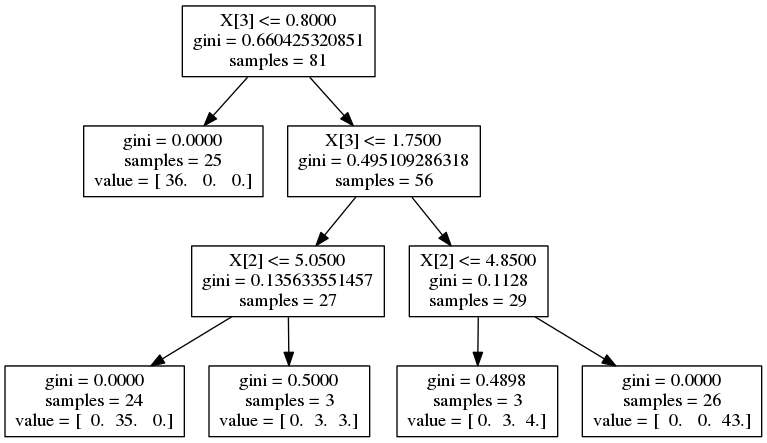

In [9]:
idx = 1
with open("temp/temp.dot", 'w') as f:
    f = tree.export_graphviz(rfc_best.estimators_[idx], out_file=f)
! dot -Tpng temp/temp.dot -o temp/temp.png
Image("temp/temp.png")

In [10]:
# TODO - Modify this code to automatically look for a specific leaf:(?)
x = df_train.columns
L0 = df_train.copy()
L0['y_train'] = y_train
i = rfc_best.estimators_[idx].indices_
L0 = L0.loc[i,:]
L11 = L0[L0[x[2]]>2.35]
L21 = L11[L11[x[1]]>3.15]
L30 = L21[L21[x[2]]<=4.95]
print L0.shape, L11.shape, L21.shape, L30.shape

(81, 5) (56, 5) (11, 5) (3, 5)


In [11]:
L30

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_train
51,6.4,3.2,4.5,1.5,1
56,6.3,3.3,4.7,1.6,1
70,5.9,3.2,4.8,1.8,1


**TODO -** Domanda per Gloria: riesci a capire che cos'è il "value" descritto nei rami puri dell'albero sopra?

**Reply: ** dovrebbe essere la distribuzione di probabilità per ogni classe nella foglia, calcolata come numero di esempi appartenenti alla classe diviso il numero totale di esempi (sempre nella foglia). Il fatto che sia un numero > 1 e che sia diverso dal numero totale di esempi è dovuto al fatto che la probabilità ottenuta viene moltiplicata per il numero "pesato" di esempi che raggiungono quel nodo. Cioè non viene usato il sample del bootstrap per contare quanti esempi finiscono qui dentro (es 25) ma quanti esempi **del dataset originale** finirebbero li dentro con quella soglia e quella variabile (in questo caso 36). Perché tutto questo? Mistero

**Remarks**
- Random Forests can naturally handle categorical variables
- Random Forests can handle equally well variables with different magnitude, and thus the do not need normalization or scaling.
- Random Forests support natively multiclass problems.
- If the number of relevant features is small, Random Forests can perform poorly with small max_features, because at each split the probabilty of picking irrelevant variables is higher
- In sklearn classification trees uses a probability distribution in the leafs rather than majority voting. This methods produces a better overall prediction and at the same time can provide also a probability measure of the class membership (not only a pure class vote).

**Advanced topics**

Other than regression and classification, Random Forests provide a series of other results that are useful for different tasks. Some of these topics apply equally well to other ensemble methods such as Gradient Boosting Trees. We will briefly review the main concepts while the detailed treatment is given in the advanced notebook.

- *Out Of Bag (OOB) estimate*: during the building phase of each tree some samples are left out and it is easy to compute a generalization measure for each random forests without relying on cross validation or separate test set. This measure is called Out Of Bag score (or OOB estimate) and it comes "for free" with the algorithm. In practice the OOB samples are used to compute an error measure (predicted value versus real value of the each sample in the OOB), averaged over all tress.
- *Variable importance*: trees (and ensemble of trees) can provide a measure indicating how important or useful a variable is in predicting the outcome. Thise feature ranking can be further used in successive analysis. In practice at each step in the construction of each tree the split point has an associated "measure", that is how much improvement in the gini index this variable provides. Another method is to use the OOB samples to compute the importance of each variable in the tree (and average over the ensemble).
- *Feature selection*: as a result of defining a ranking of features, it is possible to decide to keep only the most important variables. Feature selection allows to reduce dimensionaly and thus improve algorithm speed and convergence but still getting the same amount of precision. The procedure can be automated to remove the last feature until certain stopping criterion (e.g. decrease in accuracy) is met.
- *Partial dependence*: it shows the relation between the target and a chosen set of varialbe (at most two at a time), marginalizing over the other variables. The chosen variables are usually the most important and this plot is used to gain insight about the function learned by the ensemble and how it models the dependence between the target and the most important variables.
- *Proximity measure*: random forest can grow a $N \times N$ proximity matrix, constructed by passing the OOB samples through each tree and increasing the proximity of two sample if they ends up in the same terminal node. Plotting this matrix should provide insight on which data points are effectively close, at least as learned by the random forest classfier.

## 3 Extremely Randomized Trees

In extremely randomized trees, randomness goes one step further in the way splits are computed.

As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, **thresholds are drawn at random for each candidate feature** and the best couple (feature, random-threshold) is picked as the splitting rule.

The rationale behind this choice is that if a feature is significative with a corresponding threshold, a significant fraction of the trees will have the same feature with the same value at approximately the same position in the tree. This increases the correlation of each tree, hence increasing variance. By randomly selecting the threshold the algorithm introduces a *slightly increase in Bias* but it usually allows to *reduce the Variance* of the model a bit more.

In [12]:
xtc = ensemble.ExtraTreesClassifier()
# compute_importances is removed in version 0.16.1
params = {'n_estimators':[5, 10, 15],
          'max_features':[3, 4],
          'max_depth':[4, 8, 12],
          'min_samples_split':[2, 4],
          'min_samples_leaf':[2, 4],
          'bootstrap':[True, False]}
t0 = time()
grid = grid_search.GridSearchCV(xtc, params, cv=7)
grid.fit(df_train, y_train)
xtc_best = grid.best_estimator_

print metrics.confusion_matrix(xtc_best.predict(df_valid), y_valid)
print '\nBest Params: N est:%3i - Mx feat:%2i - Mx dpth:%2i - Mn s.splt:%2i - Mn s.leaf:%2i - Bootstrap:%2i - F1:%.3f' %(xtc_best.n_estimators,
       xtc_best.max_features, xtc_best.max_depth, xtc_best.min_samples_split, xtc_best.min_samples_leaf, xtc_best.bootstrap,
       metrics.f1_score(xtc_best.predict(df_valid), y_valid))
print 'Done in %0.3f[s]' %(time() - t0)


[[9 0 0]
 [0 9 1]
 [0 0 4]]

Best Params: N est:  5 - Mx feat: 3 - Mx dpth:12 - Mn s.splt: 4 - Mn s.leaf: 4 - Bootstrap: 1 - F1:0.958
Done in 11.931[s]


## 4 AdaBoost

**AdaBoost**, short for **Adaptive Boosting**, is a meta-algorithm, and can be used in conjunction with many other learning algorithms. The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a *weighted* majority vote (or sum) to produce the final prediction. AdaBoost is sensitive to noisy data and outliers. The classifiers it uses can be weak (i.e., display a substantial error rate), but as long as their performance is slightly better than random, they will improve the final model.

In [13]:
adb = ensemble.AdaBoostClassifier()
params = {'n_estimators':[10, 20, 30, 40],
          'learning_rate':[0.1, 0.2, 0.5, 0.7, 1.0]}
t0 = time()
grid = grid_search.GridSearchCV(adb, params, cv=3)
grid.fit(df_train, y_train)
adb_best = grid.best_estimator_

print 'F1 Score'.ljust(20), ': %.3f[s]' %(time() - t0)
for key, value in grid.best_params_.items():
    print key.ljust(20), ':', value
print 'F1 Score'.ljust(20), ': %.3f' %(metrics.f1_score(adb_best.predict(df_valid), y_valid))
print '\nConfusion Matrix:'
print metrics.confusion_matrix(adb_best.predict(df_valid), y_valid)

F1 Score             : 2.133[s]
n_estimators         : 20
learning_rate        : 0.5
F1 Score             : 0.958

Confusion Matrix:
[[9 0 0]
 [0 9 1]
 [0 0 4]]


## 5 Gradient Tree Boosting

**Gradient Tree Boosting** or **Gradient Boosted Regression Trees (GBRT)** is a generalization of boosting methods by allowing optimization of an arbitrary differentiable loss function. It's made for regression and can be adapted to classification. The method was invented by *Jerome H. Friedman in 1999*. 

The main meta-parameters to adjust are the *Tree Size* and the amount of *Regularization*. For each of these meta-parameters scikit-learn offers a serie of knobs to adjust. Let's briefly review them.

**Tree Size**

The size of each tree is an important parameter. If trees are too large they tend to decrease performance and increase computational costs. The optimal tree size is a parameter that is problem dependent and can be set with these parameters:
- `max_depth`: it controls the maximum allowed level of interaction between variables. With `max_depth=2` no interaction between variables is allowed. With `max_depth=3` the model will include the effects of the interaction between two variable at most and so on. Typical values are [4, 6, 8].
- `max_leaf_nodes`: alternative way to control the depth of the trees.  A tree with `max_leaf_nodes = n` has n - 1 split nodes and can model interaction of order at most max_leaf_nodes - 1. 
- `min_sample_leaf`: reduces the effects of outliers. Generally decreases Variance faster than increasing Bias.

**Regularization**

Controlling the number of boosting iterations is also problem dependent. Each iteration reduce the training error, so that given a sufficient number of iteration this number can be made arbitrarily small. However if the data is fitted to well it can cause overfitting. Thus there is an optimal number of iteration that must be found. There are also other ways to perform regularization. Let's review main parameters in this area:
- `n_estimators`: The number of boosting stages to perform (default=100). It is the main parameter to control regularization. 
- `learning_rate`: this controls the Shrinkage, that is another form of regularization. It's a scale factor applied to tree predictions. Default is $0.1$. A decrease in `learning_rate` (increase in Shrinkage) has the effect of "reinforce concept": the redundancy between trees increases. The effect is that the model with high Shrinkage usually requires more trees but show a much better Variance.
- `subsample`: Choosing subsample $< 1.0$ leads to a reduction of variance and an increase in bias. It's the fraction of samples to be used for fitting the individual base learners.
- `max_features`: The number of features to consider when looking for the best split. The lower the greater the reduction of variance, but also the greater the increase in bias. As for the Random Forest, use `int` $\to$ number of features ot use, `float` $\to$ percentage of features to use, `auto` $\to$ $\sqrt{n\_feat}$, `none` $\to$ all features.

Other parameters include choosing the loss function. Several loss function can be used, and as specified with the parameter `loss`.

Also GBRT allows to compute OOB estimate with the samples not included in the bootstrap sample. The OOB score are stored in the attribute `oob_improvement_.oob_improvement_[i]` and can be used for model selection, for example to set the optimal number of iterations. OOB scores are usually very pessimistic respect to cross validation but the latter is too time consuming.

The following example shows how to tune hyperparameters in two steps.

**Hyperparameter Tuning - step 01**: do a grid search by using the maximum number of `n_estimators` compatible with your available computing time: the time required for the Grid Search scales almost linearly with the number of estimators, so a good approach is to do a first run with the default 100 estimators and predict the time required from the elapsed time.

In [14]:
gtb = ensemble.GradientBoostingClassifier()
params = {'n_estimators':[100],
          'max_depth':[4, 6],
          'min_samples_leaf':[3, 5, 9],
          'learning_rate':[0.1, 0.05, 0.02],
          'subsample':[0.5, 1.0],
          'max_features':[2,3,4]}
t0 = time()
grid = grid_search.GridSearchCV(gtb, params, n_jobs=1)
grid.fit(df_train, y_train)
gtb_best = grid.best_estimator_
print 'Done in %0.3f[s]' %(time() - t0)

Done in 92.671[s]


In [15]:
for key, value in grid.best_params_.items():
    print key.ljust(20), ':', value
print 'F1 Score'.ljust(20), ': %.3f' %(metrics.f1_score(gtb_best.predict(df_valid), y_valid))
print '\nConfusion Matrix:'
print metrics.confusion_matrix(gtb_best.predict(df_valid), y_valid)


learning_rate        : 0.05
min_samples_leaf     : 9
n_estimators         : 100
subsample            : 1.0
max_features         : 4
max_depth            : 4
F1 Score             : 0.958

Confusion Matrix:
[[9 0 0]
 [0 9 1]
 [0 0 4]]


**Huperparameter Tuning - step 02**: increase `n_estimators` and fine tune `learning_rate`:

In [16]:
gtb = ensemble.GradientBoostingClassifier()
params = {'n_estimators':[400],
          'max_depth':[6],
          'min_samples_leaf':[9],
          'learning_rate':[0.05, 0.02, 0.01, 0.005],
          'subsample':[0.5],
          'max_features':[2]}
t0 = time()
grid = grid_search.GridSearchCV(gtb, params, cv=7, n_jobs=1)
grid.fit(df_train, y_train)
gtb_best = grid.best_estimator_
print 'Done in %0.3f[s]' %(time() - t0)

Done in 25.993[s]


In [17]:
for key, value in grid.best_params_.items():
    print key.ljust(20), ':', value
print 'F1 Score'.ljust(20), ': %.3f' %(metrics.f1_score(gtb_best.predict(df_valid), y_valid))
print '\nConfusion Matrix:'
print metrics.confusion_matrix(gtb_best.predict(df_valid), y_valid)

learning_rate        : 0.005
min_samples_leaf     : 9
n_estimators         : 400
subsample            : 0.5
max_features         : 2
max_depth            : 6
F1 Score             : 0.958

Confusion Matrix:
[[9 0 0]
 [0 9 1]
 [0 0 4]]


**Remarks**

*Advantages*:
- Natural handling of data of mixed type (= heterogeneous features)
- Predictive power
- Robustness to outliers in input space (via robust loss functions)
- Support for different Loss functions
- Automaticalli detects non-linear feature interactions
- scikit-learn implementation supports warm start; it is possible to add additional estimators to an already fitted model.

*Disadvantages*:
- Requires careful tuning
- Slow to train (but fast in prediction)
- Cannot extrapolate easily for points outside sample space
- Scalability issue, due to its sequential nature it is hardly parallelizable

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.